# Gaussian Filtering
In the following, you will implement a method which generates and applies a Gaussian filter for a given variance and number of samples.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio

In [2]:
def plot_multiple(images, titles, colormap='gray', max_columns=np.inf, share_axes=True):
    """Plot multiple images as subplots on a grid."""
    assert len(images) == len(titles)
    n_images = len(images)
    n_cols = min(max_columns, n_images)
    n_rows = int(np.ceil(n_images / n_cols))
    fig, axes = plt.subplots(
        n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4),
        squeeze=False, sharex=share_axes, sharey=share_axes)

    axes = axes.flat
    # Hide subplots without content
    for ax in axes[n_images:]:
        ax.axis('off')
        
    if not isinstance(colormap, (list,tuple)):
        colormaps = [colormap]*n_images
    else:
        colormaps = colormap

    for ax, image, title, cmap in zip(axes, images, titles, colormaps):
        ax.imshow(image, cmap=cmap)
        ax.set_title(title)
        
    fig.tight_layout()
    fig.show()

## Part a
Start by writing a function ``gauss`` which creates a 1D Gaussian from a given vector of integer indices $\mathtt{x = [-w, \ldots, w]}$:
$$
    \mathtt{G[i]} = \frac{1}{\sqrt{2\pi}\sigma}\operatorname{exp}\biggl(-\frac{\mathtt{x[i]}^2}{2\sigma^2}\biggr)
$$
where $\sigma$ is the standard deviation.

Tip: In NumPy the best practice is to use functions on entire arrays at once, instead of iterating over items one by one. This makes the code easier to understand and also faster (since the actual loop is implemented in C under the hood).

In [3]:
def gauss(x, sigma):
    """
    
    :param x: input vector x
    :param sigma: standard deviation
    :return: a Gaussian Filter
    """
    #print(x, np.shape(x))
    return np.divide(1, np.sqrt(2*np.pi)/sigma)*np.exp(-np.divide(x**2, 2*sigma**2))
    
    
    

<IPython.core.display.Javascript object>


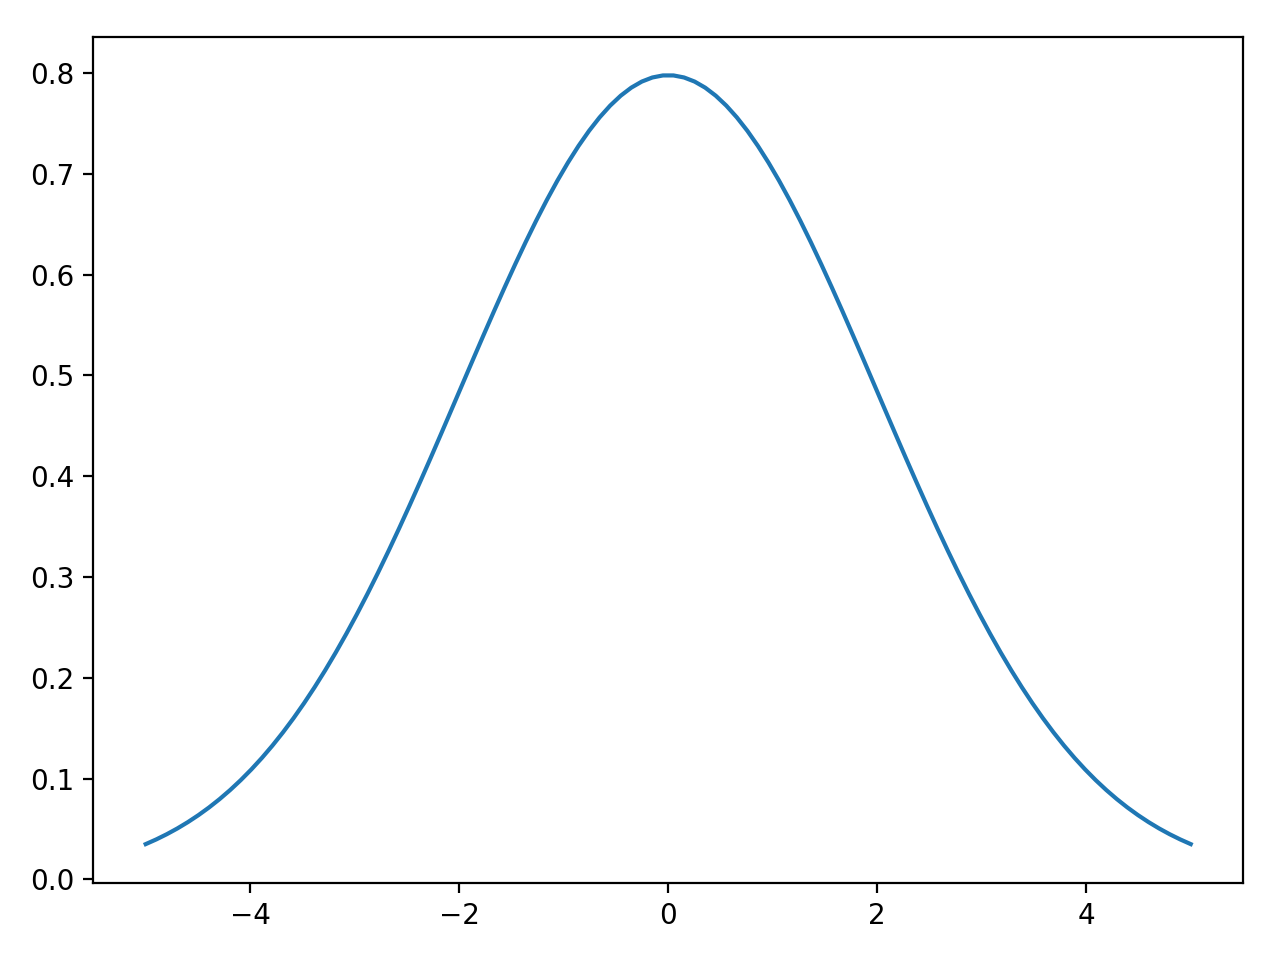

In [4]:
x = np.linspace(-5, 5, 100)
y = gauss(x, sigma=2)
fig, ax = plt.subplots()
ax.plot(x, y)
fig.tight_layout()

## Part b
Use the above function to implement a function `gaussian_filter(image, sigma, padding)`, which first generates a Gaussian filter and then applies it to the `image`.
The size of the filter should be $2 \cdot \lceil 3 \sigma \rceil + 1$.
Remember that the Gaussian is separable, *i.e.* that an equivalent 2D result can be obtained through a sequence of two 1D filtering operations.
Do not use any existing implementation for convolution in this part (e.g. `scipy.ndimage.convolve`).
However, you are allowed to use these implementations in the following questions.

In [25]:
def gaussian_filter(image, sigma, padding=True):
    """
    
    :param image: 
    :param sigma: 
    :param padding: 
    :return: 
    """
    
    # Compute the indicies vector x for Gaussian filter
    filter_size = 2*np.ceil(3*sigma)+1
    half_size = np.floor(filter_size/2)
    x = np.linspace(-half_size,half_size, num= 2*half_size+1)
    
    filter = gauss(x, sigma=sigma)
    filter = filter/np.sum(filter) #renormalize it since currently the sum of entries in filters are not 1(as we only extracted some of gaussian values from the function 'gauss'
    filter = np.reshape(filter, (-1,1))
    print(filter)
    #filter = np.hstack((filter,filter, filter)) # In order to handle RGB 3D input image data
    
    
    x = np.shape(image)[0]
    y = np.shape(image)[1]
    
    filtered_image =np.empty_like(image)
    print(np.shape(image))
    
    if padding:
        # convolution to the horizontal direction        
        for i in range(x):
            for j in range(y):

                # handling out of image range(zero padding)
                if (j-half_size <0):
                    #print('below_f', filter[-int(j-half_size):], np.shape(filter[-int(j-half_size):]))
                   # print('below_i', np.flip(image[i, 0:int(j+half_size+1), 0:3]), np.shape(np.flip(image[i, 0:int(j+half_size+1), 0:3]) ))
                    filtered_image[i,j] = np.sum(filter[-int(j-half_size):]*np.flip(image[i, 0:int(j+half_size+1)], axis=0), axis = 0)

                # handling out of image range(zero padding)    
                elif (j+half_size) >=y:
                    #print('over')
                    filtered_image[i,j] = np.sum(filter[:-int(j+half_size-(y-1))]*np.flip(image[i, int(j-half_size):y], axis=0), axis= 0)

                else:
                    filtered_image[i,j] = np.sum(filter*np.flip(image[i, int(j-half_size):int(j+half_size+1)], axis=0), axis=0)
                    #print(image[i, int(j-half_size):int(j+half_size+1)], np.flip(image[i, int(j-half_size):int(j+half_size+1)]))

        
        # convolution to the vertical direction
        for i in range(x):
            for j in range(y):

                # handling out of image range(zero padding)
                if (i-half_size <0):
                    #print('below_f', filter[-int(j-half_size):], np.shape(filter[-int(j-half_size):]))
                   # print('below_i', np.flip(image[i, 0:int(j+half_size+1), 0:3]), np.shape(np.flip(image[i, 0:int(j+half_size+1), 0:3]) ))
                    filtered_image[i,j] = np.sum(filter[-int(i-half_size):]*np.flip(filtered_image[0:int(i+half_size+1), j], axis=0), axis = 0)

                # handling out of image range(zero padding)    
                elif (i+half_size) >=x:
                    #print('over')
                    filtered_image[i,j] = np.sum(filter[:-int(i+half_size-(x-1))]*np.flip(filtered_image[int(i-half_size):x, j], axis=0), axis= 0)

                else:
                    filtered_image[i,j] = np.sum(filter*np.flip(filtered_image[int(i-half_size):int(i+half_size+1), j], axis=0), axis=0)
                    #print(image[i, int(j-half_size):int(j+half_size+1)], np.flip(image[i, int(j-half_size):int(j+half_size+1)]))
        
    
        
    
    return filtered_image

Read the image ``graf_small.png`` and apply the filters with ``sigma = 2``, ``4``, and ``8``.
Again, choose the kernel size as $2 \cdot \lceil 3 \sigma\rceil + 1$.
What do you observe?

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


[[0.0022182 ]
 [0.00877313]
 [0.02702316]
 [0.06482519]
 [0.12110939]
 [0.17621312]
 [0.19967563]
 [0.17621312]
 [0.12110939]
 [0.06482519]
 [0.02702316]
 [0.00877313]
 [0.0022182 ]]
(256, 320, 4)
[[0.00110988]
 [0.00227733]
 [0.00438967]
 [0.00794866]
 [0.01352113]
 [0.0216067 ]
 [0.03243549]
 [0.04574138]
 [0.06059748]
 [0.07541479]
 [0.08816882]
 [0.0968345 ]
 [0.09990836]
 [0.0968345 ]
 [0.08816882]
 [0.07541479]
 [0.06059748]
 [0.04574138]
 [0.03243549]
 [0.0216067 ]
 [0.01352113]
 [0.00794866]
 [0.00438967]
 [0.00227733]
 [0.00110988]]
(256, 320, 4)
[[0.00055519]
 [0.00080151]
 [0.00113918]
 [0.001594  ]
 [0.00219583]
 [0.00297798]
 [0.00397613]
 [0.00522652]
 [0.00676362]
 [0.00861707]
 [0.01080823]
 [0.01334638]
 [0.01622508]
 [0.01941887]
 [0.02288103]
 [0.02654245]
 [0.03031243]
 [0.03408118]
 [0.03772443]
 [0.04110976]
 [0.04410433]
 [0.04658346]
 [0.04843913]
 [0.04958783]
 [0.04997675]
 [0.04958783]
 [0.04843913]
 [0.04658346]
 [0.04410433]
 [0.04110976]
 [0.03772443]
 [0.

<IPython.core.display.Javascript object>


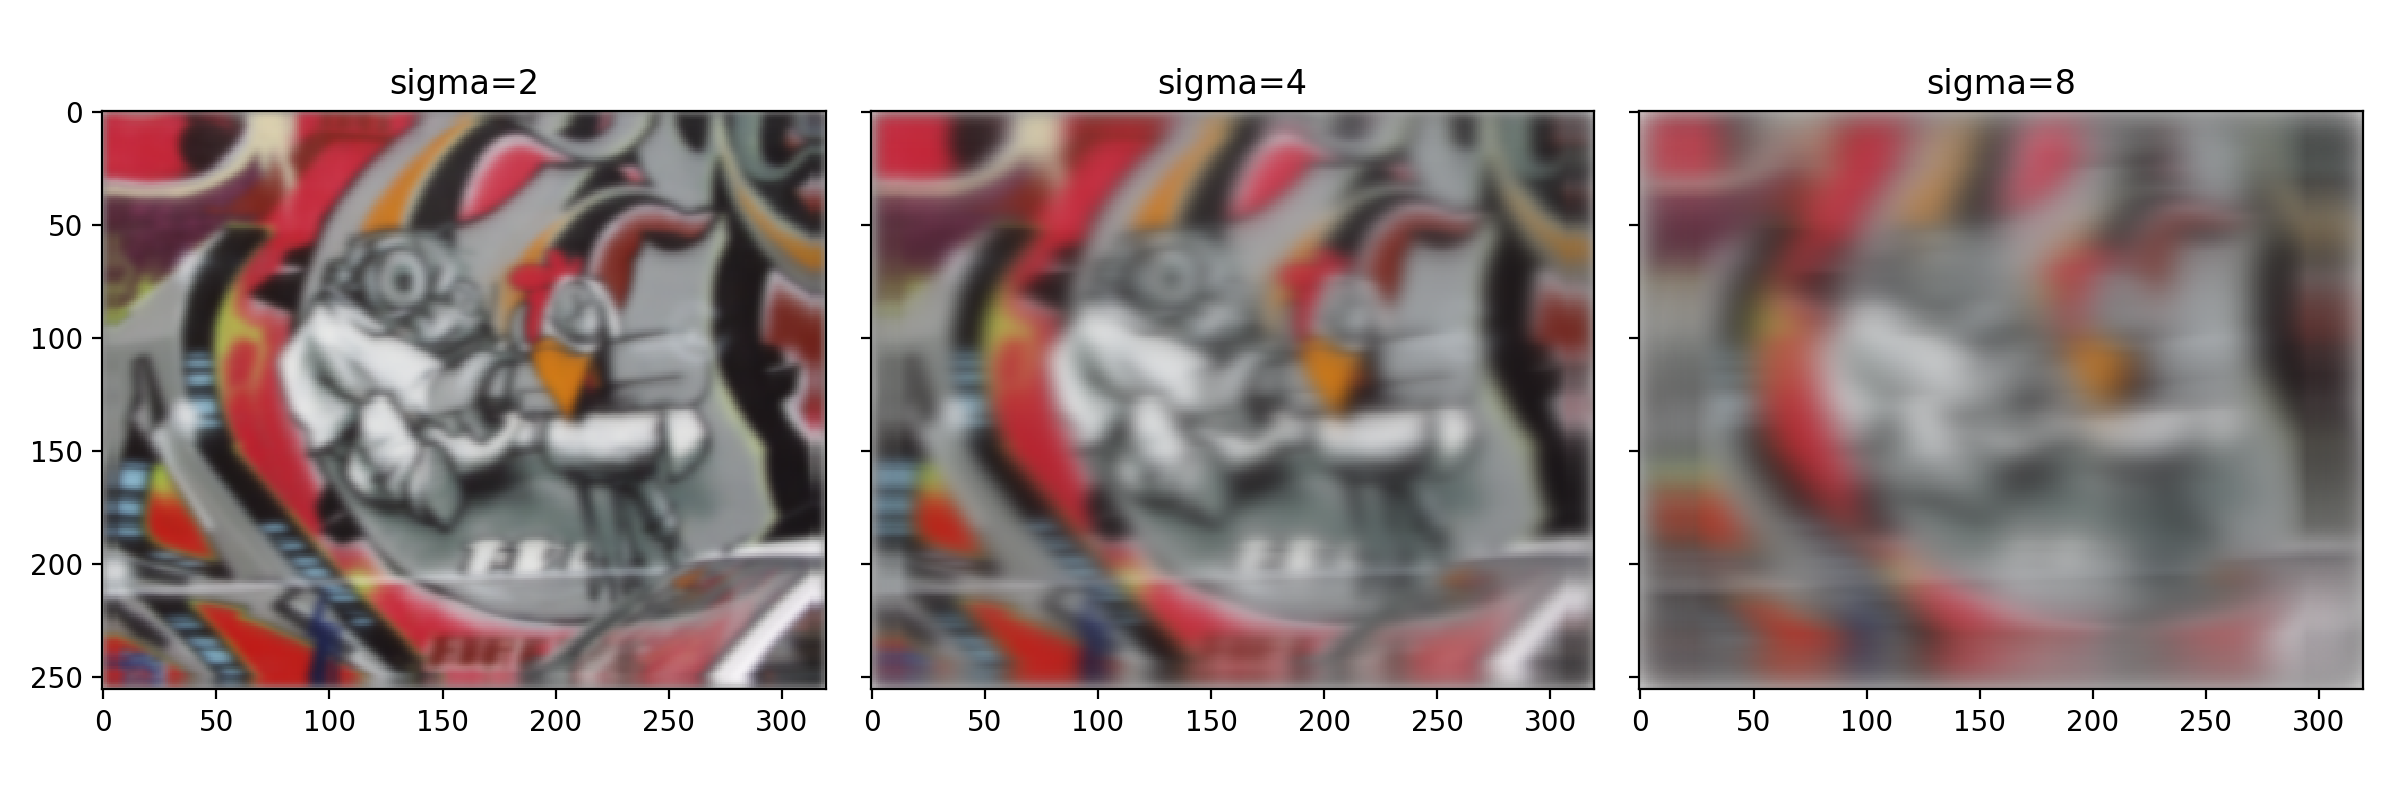

In [26]:
image = imageio.imread('graf_small.png')
sigmas = [2, 4, 8]
blurred_images = [gaussian_filter(image, s) for s in sigmas]
titles = [f'sigma={s}' for s in sigmas]

plot_multiple(blurred_images, titles)

OpenCV has many built-in function for image smoothing.
Check out this page:
https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

Compare the result of ``cv2.GaussianBlur`` with your own implementation by computing the difference image.
Was your implementation correct?

<IPython.core.display.Javascript object>


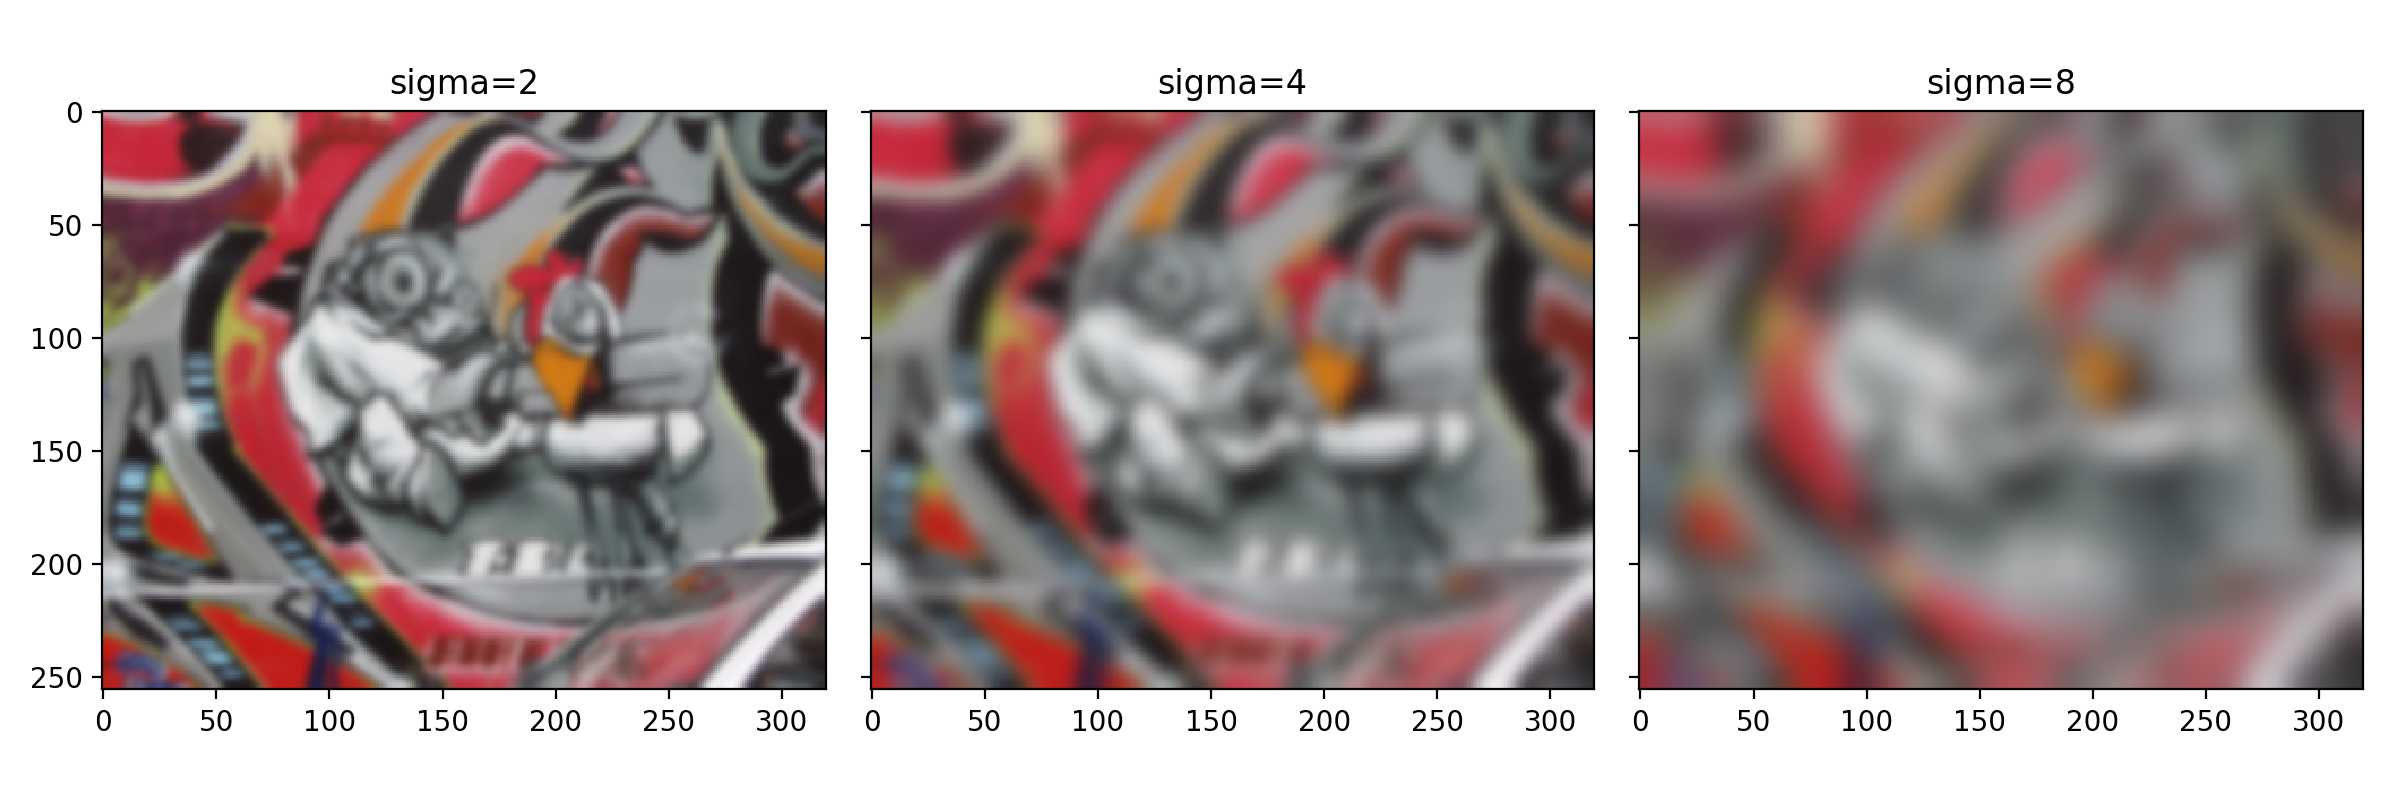

<IPython.core.display.Javascript object>


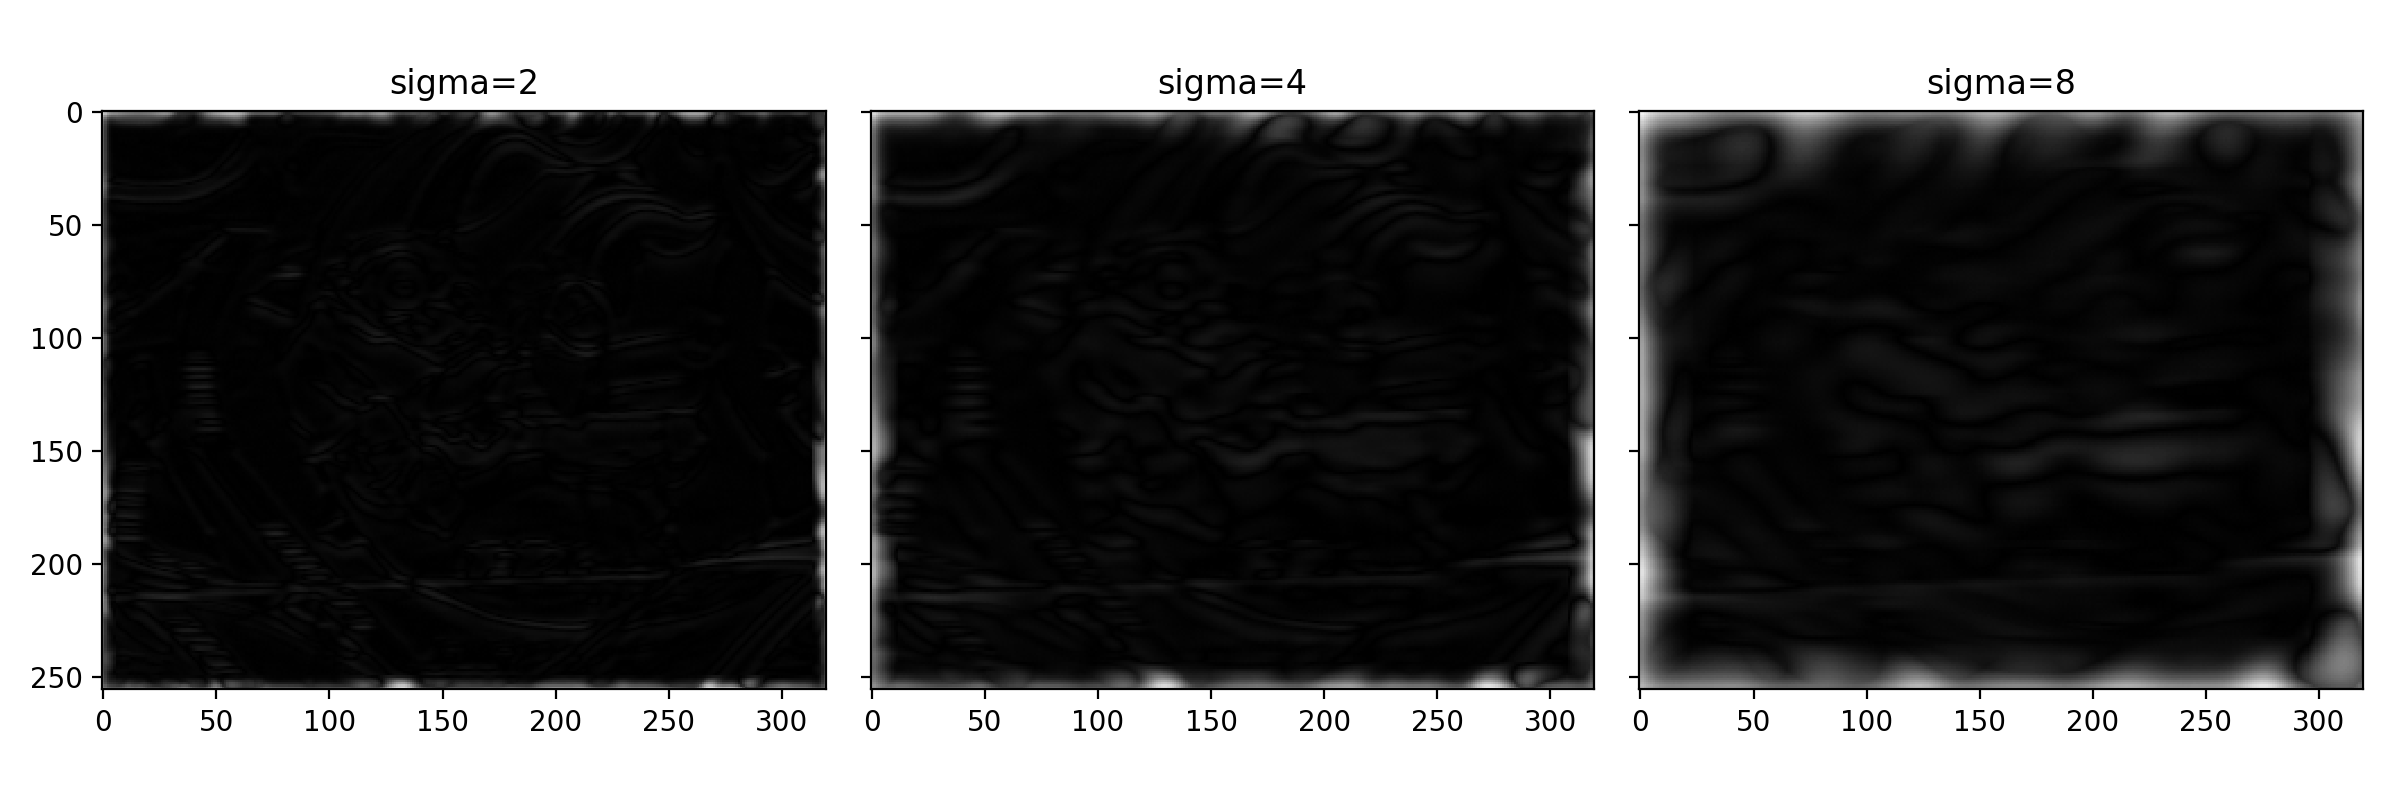

In [27]:
def gauss_cv(image, sigma):
    ks = 2 * int(np.ceil(3 * sigma)) + 1
    return cv2.GaussianBlur(image, (ks, ks), sigma, cv2.BORDER_DEFAULT)

def abs_diff(image1, image2):
    image1 = image1.astype(np.float32)
    image2 = image2.astype(np.float32)
    return np.mean(np.abs(image1-image2), axis=-1)

blurred_images_cv = [gauss_cv(image, s) for s in sigmas]
differences = [abs_diff(x,y) for x, y in zip(blurred_images, blurred_images_cv)]

plot_multiple(blurred_images_cv, titles)
plot_multiple(differences, titles)

# Small differences (around 1-2) can be expected because of rounding
# Mouse over the difference image and see the value in the corner in square brackets